# Scoring and Ranking

Import libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset (Cleaned dataset is saved so that it can be used without cleaning it every single time)

In [2]:
data = pd.read_csv('clean5.csv')

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Function used to find correlation among categorical variables (But not used)

In [3]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

### Converting relevant columns to only contain 1 (positive response), 0 (negative response), -1 (not applicable)

In [4]:
# making new column which will be born_alive_total is less than or equal to 3, and 0 for greater than 3

data["born_alive_total_bin"] = data["born_alive_total"]
data["born_alive_total_bin"] = np.where(data.born_alive_total_bin < 4, 1, data.born_alive_total_bin)
data["born_alive_total_bin"] = np.where(data.born_alive_total_bin >= 4, 0, data.born_alive_total_bin)

In [5]:
# making new column with 1 if marriage age at time of marriage is greater than 18, and 0 if less than 18

data["age_at_time_of_marriage"] = np.where(data.age_at_time_of_marriage < 0, -1, data.age_at_time_of_marriage)
data["age_at_time_of_marriage"] = np.where(data.age_at_time_of_marriage > 1900, -1, data.age_at_time_of_marriage)
data["under_age_marriage"] = data["age_at_time_of_marriage"]
data["under_age_marriage"] = np.where(((data.under_age_marriage >= 0) & (data.under_age_marriage < 18)), 0, data.under_age_marriage)
data["under_age_marriage"] = np.where(data.under_age_marriage >= 18, 1, data.under_age_marriage)

In [6]:
# making new column with 0 if age of mother when baby born is greater than 40 and  otherwise

data["mother_age_when_baby_was_born_bin"] = data["mother_age_when_baby_was_born"]
data["mother_age_when_baby_was_born_bin"] = np.where(((data.mother_age_when_baby_was_born_bin >= 0) & (data.mother_age_when_baby_was_born_bin < 20)), 0, data.mother_age_when_baby_was_born_bin)
data["mother_age_when_baby_was_born_bin"] = np.where(data.mother_age_when_baby_was_born_bin > 40, 0, data.mother_age_when_baby_was_born_bin)
data["mother_age_when_baby_was_born_bin"] = np.where(((data.mother_age_when_baby_was_born_bin >= 20) & (data.mother_age_when_baby_was_born_bin <= 40)), 1, data.mother_age_when_baby_was_born_bin)

In [7]:
# converting negative response (2) in columns present in is_list to 0, to maintain consistency

is_list = ["is_tubectomy", "is_vasectomy", "is_copper_t", "is_pills_daily", "is_piils_weekly", "is_emergency_contraceptive", "is_condom", "is_moder_methods", "is_contraceptive", "is_periodic_abstinence", "is_withdrawal", "is_amenorrahoea", "is_other_traditional_method"]
for col in is_list:
    data[col] = data[col].replace([2], 0)

In [8]:
# Similarly here to maintain consistency 2 and 3 (negative responses) are replaced with 0

data["is_any_fp_methos_used"] = data["is_any_fp_methos_used"].replace([2, 3], 0)

In [9]:
# all values in aware_cols are either 'Aware' or 'Not Aware', so changing it to 1 and 0 respectively

aware_cols = ["aware_abt_danger_signs_new_born", "aware_abt_haf", "aware_abt_hiv", "aware_abt_ort_ors", "aware_abt_ort_ors_zinc", "aware_abt_rti", "aware_of_the_danger_signs"]
for col in aware_cols:
    data[col] = data[col].replace(['Aware'], 1)
    data[col] = data[col].replace(['Not Aware'], 0)

In [10]:
# in 'chew', 'smoke', 'alcohol', value is changes to 1 if chewed (with/without tobacco), smoke and drink alcohol
# 0 if nothing, and -1 if data not provided

data["chew"] = data["chew"].replace([0, 7, 8], -1)
data["chew"] = data["chew"].replace([1, 2, 3, 4, 5, 6], 0)
data["chew"] = data["chew"].replace([-1], 1)
data["smoke"] = data["smoke"].replace([0, 4, 5], -1)
data["smoke"] = data["smoke"].replace([1, 2, 3], 0)
data["smoke"] = data["smoke"].replace([-1], 1)
data["alcohol"] = data["alcohol"].replace([0, 4, 5], -1)
data["alcohol"] = data["alcohol"].replace([1, 2, 3], 0)
data["alcohol"] = data["alcohol"].replace([-1], 1)

In [11]:
# Similarly here to maintain consistency 2 (negative responses) is replaced with 0

data["is_injectable_contraceptive"] = data["is_injectable_contraceptive"].replace([2], 0)

In [12]:
# if no of times conceived is greater than 4 then 0 else 1, -1 for not applicable

data["no_of_times_conceived"] = np.where(data.no_of_times_conceived < 0, -1, data.no_of_times_conceived)
data["no_of_times_conceived"] = np.where(((data.no_of_times_conceived >= 0) & (data.no_of_times_conceived <= 4)), 1, data.no_of_times_conceived)
data["no_of_times_conceived"] = np.where(data.no_of_times_conceived > 4, 0, data.no_of_times_conceived)

In [13]:
# making new column which will be 0 if age at first conception is greater than 40 or less than 20, and 1 otherwise

data["age_at_first_conception_bin"] = data["age_at_first_conception"]
data["age_at_first_conception_bin"] = np.where(((data.age_at_first_conception_bin >= 0) & (data.age_at_first_conception_bin < 20)), 0, data.age_at_first_conception_bin)
data["age_at_first_conception_bin"] = np.where(data.age_at_first_conception_bin > 40, 0, data.age_at_first_conception_bin)
data["age_at_first_conception_bin"] = np.where(((data.age_at_first_conception_bin >= 20) & (data.age_at_first_conception_bin <= 40)), 1, data.age_at_first_conception_bin)

In [14]:
# Similarly here to maintain consistency 2 and 3 (negative responses) are replaced with 0

data["iscoveredbyhealthscheme"] = data["iscoveredbyhealthscheme"].replace([2, 3], 0)

These are the columns selected based on which scored is calculated

<strong>Note that not all columns are selected because these can only be used to convert to boolean variables, rest of columns are based on answer of these and inferences from them are in visualization section</strong>

In [15]:
cols_for_score = ["district", "rural", "born_alive_total_bin", "under_age_marriage", "mother_age_when_baby_was_born_bin", "is_tubectomy", "is_vasectomy", "is_copper_t", "is_pills_daily", "is_piils_weekly", "is_emergency_contraceptive", "is_condom", "is_moder_methods", "is_contraceptive", "is_periodic_abstinence", "is_withdrawal", "is_amenorrahoea", "is_other_traditional_method", "is_any_fp_methos_used", "aware_abt_danger_signs_new_born", "aware_abt_haf", "aware_abt_hiv", "aware_abt_ort_ors", "aware_abt_ort_ors_zinc", "aware_abt_rti", "aware_of_the_danger_signs", "chew", "smoke", "alcohol", "is_injectable_contraceptive", "no_of_times_conceived", "age_at_first_conception_bin", "iscoveredbyhealthscheme"]

Making new dataframe with only those columns required to calculate score

In [16]:
data_score = data[cols_for_score]

Population of each district according to Census-2011 ([https://www.censusindia.co.in/districts](https://www.censusindia.co.in/districts))

In [17]:
population = [1890422, 687271, 1696694, 330086, 618931, 954605, 242285, 483439, 259648, 622506, 391605, 259898, 1648902]

In [18]:
districts = data["district"].unique()

Calculating rural and urban population using result given [here](https://indiafacts.in/india-census-2011/urban-rural-population-o-india/)

In [19]:
import math
rural = []
urban = []
for p in population:
    r = math.floor(p*0.6884)
    u = p-r
    rural.append(r)
    urban.append(u)

Margin calculation for rural and urban area using online calculator - [Calculator](https://www.checkmarket.com/sample-size-calculator/#sample-size-margin-of-error-calculator)

In [20]:
rural_margin = [0.0095, 0.0035, 0.0048, 0.0067, 0.0036, 0.0069, 0.0032, 0.0053, 0.0105, 0.0048, 0.0040, 0.0041, 0.0070]
urban_margin = [0.0117, 0.0118, 0.0044, 0.0200, 0.0113, 0.0092, 0.0667, 0.0115, 0.0262, 0.0185, 0.0105, 0.0288, 0.0110]

Making df of population to show results

In [21]:
df_pop = pd.DataFrame(data = {'District': districts, 'Population': population, 'Rurat Population': rural, 'Urban Population': urban})
df_pop

,District,Population,Rurat Population,Urban Population
0,HARIDWAR,1890422,1301366,589056
1,GARHWAL,687271,473117,214154
2,DEHRADUN,1696694,1168004,528690
3,UTTARKASHI,330086,227231,102855
4,TEHRI GARHWAL,618931,426072,192859
5,NAINITAL,954605,657150,297455
6,RUDRAPRAYAG,242285,166788,75497
7,PITHORAGARH,483439,332799,150640
8,CHAMPAWAT,259648,178741,80907
9,ALMORA,622506,428533,193973


## Calculating score

In [22]:
score = []

The cell below calculates the score for each district on each aspect, based on area (rural/urban)

Score is calculated by first making a confusion matrix and then fraction of negative response with population of that region

In [23]:
for d in data["district"].unique():
    data_d = data_score[data_score["district"]==d]
    score_d = []
    for i in range(2, len(cols_for_score)):
        confusion_matrix = pd.crosstab(data["rural"], data_d[cols_for_score[i]])
        score_c = []
        for r in data["rural"].unique():
            score_v = confusion_matrix[0].loc[r]/sum(confusion_matrix[0])
            score_c.append(score_v)
        score_d.append(score_c)
    score.append(score_d)

Heatmap of Confusion matrix of region vs chew

Text(91.68, 0.5, 'Area')

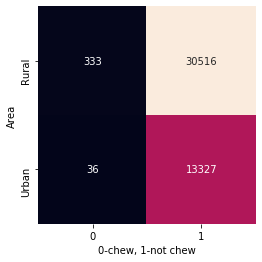

In [24]:
con_mat = pd.crosstab(data["rural"], data_d["smoke"])
fig2=plt.figure()
fig2.add_subplot(111)
sns.heatmap(con_mat, annot=True, square=True, cbar=False, fmt="d")
plt.xlabel("0-chew, 1-not chew")
plt.ylabel("Area")

Score calculated for each district and each aspect (first column for rural and second for urban)

In [25]:
score

[[[0.7579523323750348, 0.2420476676249652],
  [0.7119929967901955, 0.2880070032098045],
  [0.7234146341463414, 0.27658536585365856],
  [0.7023809523809523, 0.2976190476190476],
  [0.7261904761904762, 0.27380952380952384],
  [0.7845249755142018, 0.21547502448579825],
  [0.7898089171974523, 0.21019108280254778],
  [0.7531541415249589, 0.24684585847504115],
  [0.7908928571428572, 0.20910714285714285],
  [0.7790055248618785, 0.22099447513812154],
  [0.6639056714090821, 0.3360943285909179],
  [0.6130792894710727, 0.38692071052892724],
  [0.7701863354037267, 0.22981366459627328],
  [0.7909604519774012, 0.20903954802259886],
  [0.7050827423167849, 0.29491725768321514],
  [0.6444681146667902, 0.35553188533320984],
  [0.6657004130734111, 0.3342995869265889],
  [0.6355211182011546, 0.36447888179884536],
  [0.62434681633443, 0.37565318366557],
  [0.7350447479981159, 0.26495525200188413],
  [0.6320183486238532, 0.3679816513761468],
  [0.6143609421561824, 0.38563905784381763],
  [0.6032634032634032

Overall score is calculated by taking mean for each region on every aspect (since every aspect is equally important hence weights to calculate score is same for all aspect)

Then margin of error is added and minimum of resultant score and 1 ise taken and overall score of that region

In [26]:
score_updated = []
i = 0
for s in score:
    rural_score = 0
    urban_score = 0
    for l in s:
        rural_score += l[0]
        urban_score += l[1]
    score_updated.append([min(rural_score/len(s)+rural_margin[i], 1), min(urban_score/len(s)+urban_margin[i], 1)])

Estimation of Population required to be covered under healthcare programs

In [27]:
population_req = []
for i in range(len(score_updated)):
    population_req.append([math.ceil(score_updated[i][0]*rural[i]), math.ceil(score_updated[i][1]*urban[i])])

In [28]:
population_req

[[937052, 177393],
 [442564, 18371],
 [642140, 249238],
 [213025, 8612],
 [402061, 14958],
 [443767, 102893],
 [166788, 1127],
 [295674, 19999],
 [156540, 11765],
 [411046, 12028],
 [244318, 14023],
 [177087, 2544],
 [852063, 139010]]

Number of Programs to be conducted in each region (20000 people per program)

In [29]:
no_of_program = []
for p in population_req:
    no_of_program.append([max(p[0]//20000, 1), max(p[1]//20000, 1)])

Some lists are separately created from combined one, to make dataframe to visualize result

In [30]:
population_req_total = []
population_req_rural = []
population_req_urban = []
no_of_program_rural = []
no_of_program_urban = []
for p in population_req:
    population_req_total.append(p[0]+p[1])
for p in population_req:
    population_req_rural.append(p[0])
for p in population_req:
    population_req_urban.append(p[1])
for n in no_of_program:
    no_of_program_rural.append(n[0])
for n in no_of_program:
    no_of_program_urban.append(n[1])

In [31]:
df_pop_no = pd.DataFrame(data={'District': districts, 'Population to be covered': population_req_total, 'Rural Population': population_req_rural, '# Programs Rural': no_of_program_rural, 'Urban Population': population_req_urban, '# Programs Urban': no_of_program_urban})
df_pop_no

,District,Population to be covered,Rural Population,# Programs Rural,Urban Population,# Programs Urban
0,HARIDWAR,1114445,937052,46,177393,8
1,GARHWAL,460935,442564,22,18371,1
2,DEHRADUN,891378,642140,32,249238,12
3,UTTARKASHI,221637,213025,10,8612,1
4,TEHRI GARHWAL,417019,402061,20,14958,1
5,NAINITAL,546660,443767,22,102893,5
6,RUDRAPRAYAG,167915,166788,8,1127,1
7,PITHORAGARH,315673,295674,14,19999,1
8,CHAMPAWAT,168305,156540,7,11765,1
9,ALMORA,423074,411046,20,12028,1


Printing number of programs required to be conducted (also shown in dataframe above)

In [32]:
for d in range(len(districts)):
    print("In {0} (rural area), number of health care awareness programs required = {1}".format(districts[d], no_of_program[d][0]))
    print("In {0} (urban area), number of health care awareness programs required = {1}".format(districts[d], no_of_program[d][1]))

In HARIDWAR (rural area), number of health care awareness programs required = 46
In HARIDWAR (urban area), number of health care awareness programs required = 8
In GARHWAL (rural area), number of health care awareness programs required = 22
In GARHWAL (urban area), number of health care awareness programs required = 1
In DEHRADUN (rural area), number of health care awareness programs required = 32
In DEHRADUN (urban area), number of health care awareness programs required = 12
In UTTARKASHI (rural area), number of health care awareness programs required = 10
In UTTARKASHI (urban area), number of health care awareness programs required = 1
In TEHRI GARHWAL  (rural area), number of health care awareness programs required = 20
In TEHRI GARHWAL  (urban area), number of health care awareness programs required = 1
In NAINITAL (rural area), number of health care awareness programs required = 22
In NAINITAL (urban area), number of health care awareness programs required = 5
In RUDRAPRAYAG (rur

## Ranking

3 ranks are calculated
    1. Only rural areas
    2. Only urban areas
    3. Whole District

In [33]:
population_coverage = []
for d in range(len(districts)):
    population_coverage.append([districts[d], population_req[d][0]/rural[d], population_req[d][1]/urban[d], (population_req[d][0]+population_req[d][1])/population[d]])

Creating lists and sorting it based on type of rank calculation

In [34]:
rank_rural = population_coverage.copy()
rank_rural.sort(key=lambda x: x[1])
rank_urban = population_coverage.copy()
rank_urban.sort(key=lambda x: x[2])
rank_district = population_coverage.copy()
rank_district.sort(key=lambda x: x[3])

Function to make dataframe with 1 column as district name and other as score (sorted according to score)

In [35]:
def make_df(rank_, i, col_name):
    rank = []
    districts = []
    for l in rank_:
        rank.append(l[i])
        districts.append(l[0])
    return pd.DataFrame(data={'District': districts, col_name: rank})

In [36]:
rural_rank_df = make_df(rank_rural, 1, "Score (Rural)")
urban_rank_df = make_df(rank_urban, 2, "Score (Urban)")
district_rank_df = make_df(rank_district, 3, "Score (District)")

Visualizing District rank and score

In [37]:
rural_rank_df

,District,Score (Rural)
0,DEHRADUN,0.549776
1,NAINITAL,0.675290
2,HARIDWAR,0.720053
3,UDHAM SINGH NAGAR,0.750648
4,CHAMPAWAT,0.875792
5,PITHORAGARH,0.888446
6,CHAMOLI,0.906291
7,GARHWAL,0.935422
8,UTTARKASHI,0.937482
9,TEHRI GARHWAL,0.943646


In [38]:
urban_rank_df

,District,Score (Urban)
0,RUDRAPRAYAG,0.014928
1,BAGESHWAR,0.031413
2,ALMORA,0.062009
3,TEHRI GARHWAL,0.077559
4,UTTARKASHI,0.083730
5,GARHWAL,0.085784
6,CHAMOLI,0.114919
7,PITHORAGARH,0.132760
8,CHAMPAWAT,0.145414
9,UDHAM SINGH NAGAR,0.270554


In [39]:
district_rank_df

,District,Score (District)
0,DEHRADUN,0.525362
1,NAINITAL,0.572656
2,HARIDWAR,0.589522
3,UDHAM SINGH NAGAR,0.601050
4,CHAMPAWAT,0.648204
5,PITHORAGARH,0.652974
6,CHAMOLI,0.659698
7,GARHWAL,0.670674
8,UTTARKASHI,0.671452
9,TEHRI GARHWAL,0.673773


In [40]:
for i in range(len(population_coverage)):
    print("\nIn {0} (rural), {1}% of population is unaware of health care problems".format(districts[i], population_coverage[i][0]*100))
    print("In {0} (urban), {1}% of population is unaware of health care problems".format(districts[i], population_coverage[i][1]*100))
    print("In {0}, {1}% of population is unaware of health care problems".format(districts[i], population_coverage[i][2]*100))


In HARIDWAR (rural), HARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWARHARIDWAR% of population is unaware of health care problems
In HARIDWAR (urban), 72.00526216298874% of population is unaware of health care problems
In HARIDWAR, 30.11479383963494% of pop

**Inferences from ranking:**

1. In every district, in rural areas more than 50% of the population is unaware of health related problems, with 9 districts having more than 80%, out of 13, and 1 even having almost all population as unaware.
2. Condition is better in urban areas as compared to rural areas, with all districts having less than 50% of population as not aware of health related problems. Dehradun, unexpectedly, is the area with the most number of unaware people despite being best in rural areas.
3. Similar to Dehradun, Rudraprayag is worst in rural areas, but best in urban areas.
4. Since almost 70% of the total population is from rural areas, rural areas should have more weight in calculating the score of districts. From the table above we can see that this is the case, i.e. ranking of districts is the same as their rural ranking.
